# Comparison RMSD 

As the two metrics provide similar results, despite being significantly different, we compared them on both [villin](#villin) and [NTL9](#ntl9).

RMSD is a measure of the displacement of the atoms from a reference structure, whereas ID, in this case, can detect different features of the protein.

In [ ]:
from md_intrinsic_dimension import intrinsic_dimension, section_id, secondary_structure_id
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap
import seaborn as sns
import logging
from moleculekit.molecule import Molecule
import moleculekit.projections.metricrmsd as rmsd
from itertools import product
import mdtraj as md

#build personalised cmap
colors = mpl.colors.ListedColormap(
    name="discrete-bicolor",
    colors=["#e9ff99","#ceff29", "#A5CC21", "#C099F3", "#6100e0", "#4E00B3"])


#set font dimension
plt.rcParams.update({
	'axes.titlesize': 13,
	'axes.labelsize': 13,
	'xtick.labelsize': 11,
	'ytick.labelsize': 11,
	'legend.fontsize': 11,
	'legend.title_fontsize': 13,
	'lines.linewidth' : 1,
	'lines.markersize': 8,
})

## Villin

In [ ]:
topology='examples/villin/2f4k.pdb'
trajectory='examples/villin/2f4k'
protein = 'villin'

data = []
states = ['u0','u1', 'u2', 'f0', 'f1', 'f2'] 
#estimators = ['CorrInt','lPCA', 'MADA', 'MLE', 'MOM', 'TLE', 'TwoNN']
estimators = ['TwoNN']
projection_method = 'Dihedrals'  # or 'Distances'
projection_kwargs = {'skip': 3}
 
ref = Molecule(topology)


for estimator, state in product(estimators, states):
    mean_all, mean_last, local_id = intrinsic_dimension(topology=topology, trajectory=trajectory+f'_{state}.xtc', projection_method=projection_method, projection_kwargs = projection_kwargs,id_method='local',id_kwargs={'estimator': estimator}, verbose=False)
    mol = ref
    mol.read(trajectory+f'_{state}.xtc')
    met=rmsd.MetricRmsd(ref, trajrmsdstr= 'protein and name CA')
    rmsd_values=met.project(mol)
    #t=md.load(trajectory+f'_{state}.xtc', top=topology)
    #rmsf = md.rmsf(t, None) #if ref not specified computes rmsf from avg.	
    #rmsd = md.rmsd(t, ref, 2)
	
    data.append({'trajectory': state,
	  'estimator': estimator,
	  'mean_all': mean_all,
	  'mean_last': mean_last,
      'local_id': local_id,
	  #'rmsf' : rmsf,
	  'rmsd': rmsd_values})
data = pd.DataFrame(data)
data["folded"] = data["trajectory"].str.startswith("f")


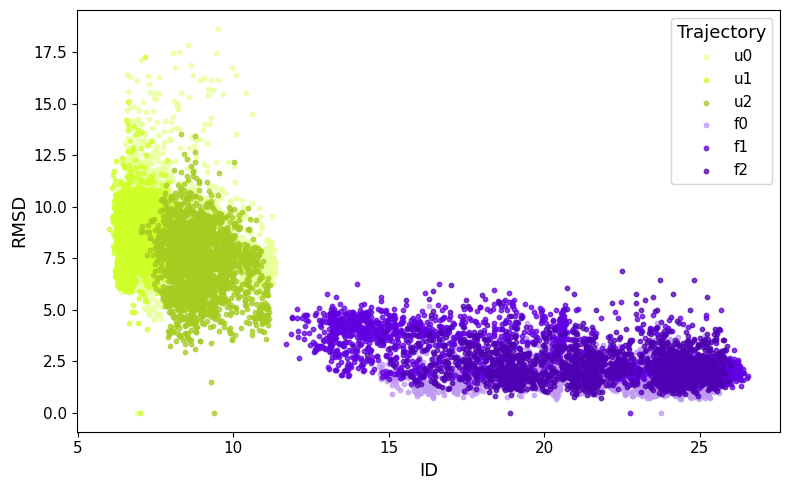

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

# group data by state
for i, s in enumerate(states):
    subset = data[data['trajectory'] == s]
    local_id_array = np.concatenate(subset['local_id'].values)
    rmsd_array = np.concatenate(subset['rmsd'].values)
    ax.scatter(local_id_array, rmsd_array,color=colors.colors[i], alpha=0.75, label=s, s=10)#, edgecolor = 'black'
ax.set_box_aspect(1)
plt.xlabel('ID')
plt.ylabel('RMSD (Å)')
plt.legend(loc='best', title='Trajectory')
plt.tight_layout()
#plt.savefig(f'../extra/villin_ID_vs_RMSD_{projection_method}.pdf', dpi = 300)
plt.show()

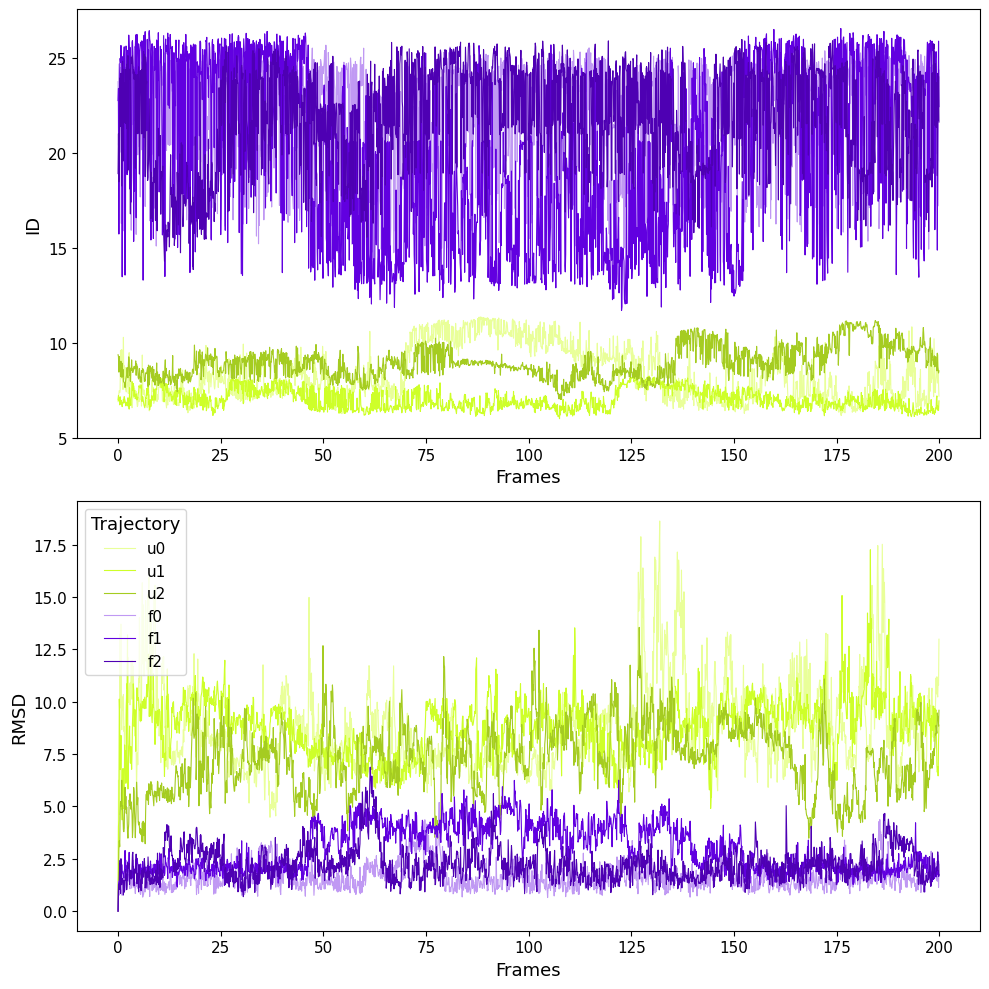

In [ ]:
states = ['u0','u1', 'u2', 'f0', 'f1', 'f2'] 

state_ids = []

fig, ax = plt.subplots(figsize=(10, 10), nrows=2)
#fig.suptitle("Instantaneous Intrinsic Dimension", fontsize=16) 
#instantaneous id
for i, s in enumerate(states):
    local_id = data.loc[i, 'local_id']
    rmsd = data.loc[i, 'rmsd']
    frames = np.arange(len(local_id))
    time_ns = frames / 10.0  # Convert frames to nanoseconds

    ax[0].plot(time_ns, local_id, color=colors.colors[i], linewidth=0.8)
    ax[1].plot(time_ns, rmsd, color=colors.colors[i], linewidth=0.8, label = s)
ax[0].set_xlabel("Frames")
ax[0].set_ylabel("ID")
ax[1].set_xlabel("Frames")
ax[1].set_ylabel("RMSD (Å)")
#ax[0].set_title("Time")
ax[1].legend(loc="upper left", title='Trajectory')   
#fig.legend(bbox_to_anchor=(1.20, 0.5), loc='center right', title='Trajectory')
plt.tight_layout()
#plt.savefig(f'../extra/villin_ID_and_RMSD_{projection_method}.png', dpi = 300)
plt.show()


## NTL9

In [ ]:
topology='examples/NTL9/ntl9.pdb'
trajectory='examples/NTL9/ntl9'
protein = 'ntl9'

data = []
states = ['u0','u1', 'u2', 'f0', 'f1', 'f2'] 
#estimators = ['CorrInt','lPCA', 'MADA', 'MLE', 'MOM', 'TLE', 'TwoNN']
estimators = ['TwoNN']
projection_method = 'Dihedrals'  # or 'Distances'
projection_kwargs = {'skip': 3}
 
ref = Molecule(topology)


for estimator, state in product(estimators, states):
    mean_all, mean_last, local_id = intrinsic_dimension(topology=topology, trajectory=trajectory+f'_{state}.xtc', projection_method=projection_method, projection_kwargs = projection_kwargs,id_method='local',id_kwargs={'estimator': estimator}, verbose=False)
    mol = ref
    mol.read(trajectory+f'_{state}.xtc')
    met=rmsd.MetricRmsd(ref, trajrmsdstr= 'protein and name CA')
    rmsd_values=met.project(mol)
    #t=md.load(trajectory+f'_{state}.xtc', top=topology)
    #rmsf = md.rmsf(t, None) #if ref not specified computes rmsf from avg.	
    #rmsd = md.rmsd(t, ref, 2)
	
    data.append({'trajectory': state,
	  'estimator': estimator,
	  'mean_all': mean_all,
	  'mean_last': mean_last,
      'local_id': local_id,
	  #'rmsf' : rmsf,
	  'rmsd': rmsd_values})
data = pd.DataFrame(data)
data["folded"] = data["trajectory"].str.startswith("f")


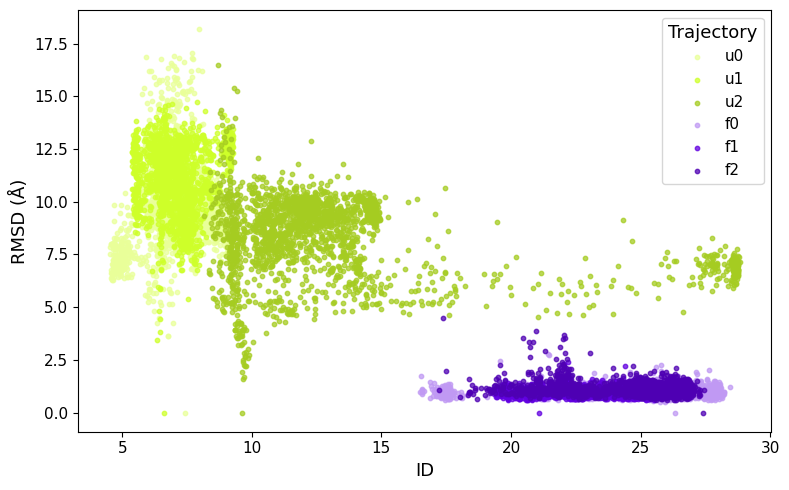

In [ ]:
#ID vs RMSD

fig1, ax1 = plt.subplots(figsize=(8,8))

# group data by state
for i, s in enumerate(states):
    subset = data[data['trajectory'] == s]
    local_id_array = np.concatenate(subset['local_id'].values)
    rmsd_array = np.concatenate(subset['rmsd'].values)
    ax1.scatter(local_id_array, rmsd_array,color=colors.colors[i], alpha=0.75, label=s, s=10)#, edgecolor = 'black'
ax1.set_box_aspect(1)
plt.xlabel('ID')
plt.ylabel('RMSD (Å)')
plt.legend(loc='best', title='Trajectory')
plt.tight_layout()
#plt.savefig(f'../extra/ntl9_ID_vs_RMSD_{projection_method}.pdf', dpi = 300)
plt.show()

states = ['u0','u1', 'u2', 'f0', 'f1', 'f2'] 


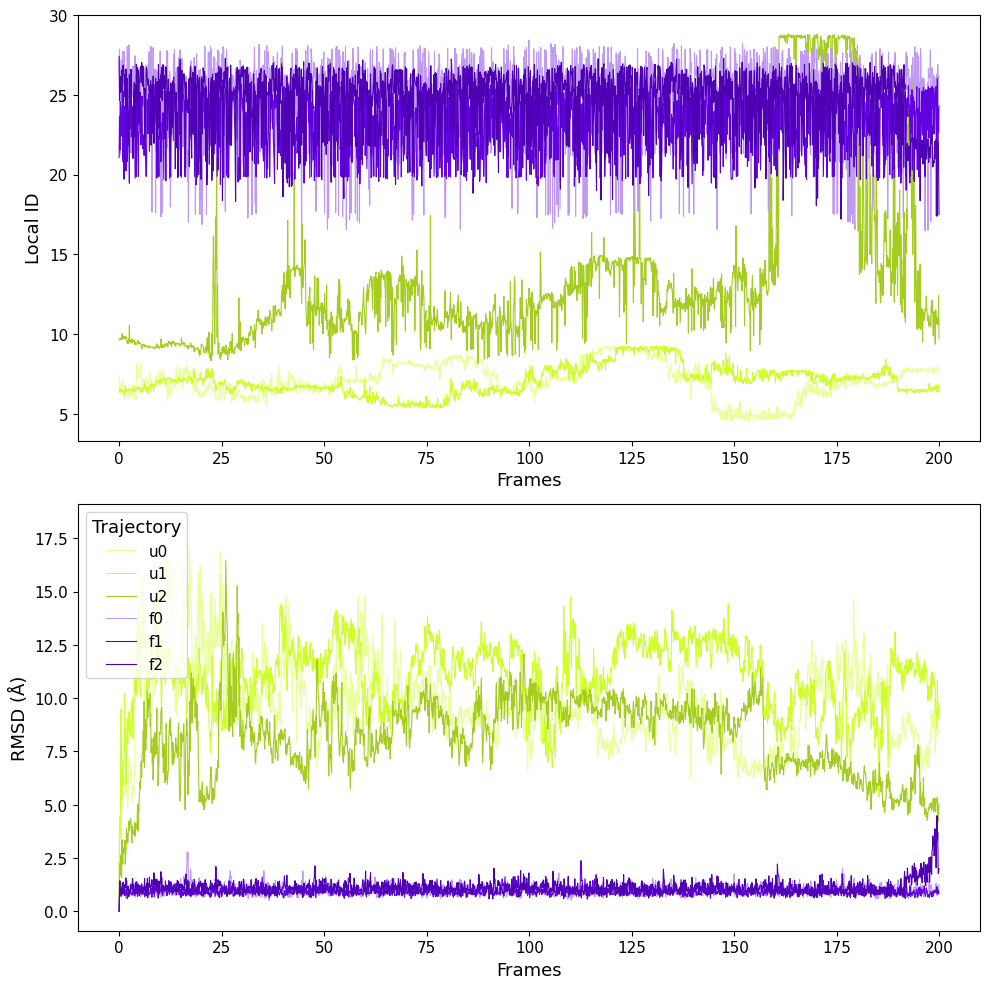

In [ ]:
#ID vs time RMSD vs TIME

fig2, ax2 = plt.subplots(figsize=(10, 10), nrows=2)
#fig.suptitle("Instantaneous Intrinsic Dimension", fontsize=16) 
#instantaneous id
for i, s in enumerate(states):
    local_id = data.loc[i, 'local_id']
    rmsd = data.loc[i, 'rmsd']
    frames = np.arange(len(local_id))
    time_ns = frames / 10.0  # Convert frames to nanoseconds

    ax2[0].plot(time_ns, local_id, color=colors.colors[i], linewidth=0.8)
    ax2[1].plot(time_ns, rmsd, color=colors.colors[i], linewidth=0.8, label = s)
ax2[0].set_xlabel("Frames")
ax2[0].set_ylabel("Local ID")
ax2[1].set_xlabel("Frames")
ax2[1].set_ylabel("RMSD (Å)")
#ax[0].set_title("Time")
ax2[1].legend(loc="upper left", title='Trajectory')   
#fig2.legend(bbox_to_anchor=(1.20, 0.5), loc='center right', title='Trajectory')
plt.tight_layout()
#plt.savefig(f'../extra/ntl9_ID_and_RMSD_{projection_method}.png', dpi = 300)
plt.show()